In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X, y = make_classification(
     n_samples=10000,
     n_features=20,
    n_informative=16,
    n_redundant=4,
    n_repeated=0,
    n_classes=2,
    random_state=42
)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1014
           1       0.78      0.80      0.79       986

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



In [4]:
probabilities = model.predict_proba(X_test)[:,1]
y_pred = (probabilities > 0.35545321300555544).astype(int)

In [5]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76      1014
           1       0.73      0.90      0.80       986

    accuracy                           0.78      2000
   macro avg       0.80      0.79      0.78      2000
weighted avg       0.80      0.78      0.78      2000



In [6]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, probabilities)
fpr[:5], tpr[:5], threshold[:5]

(array([0.        , 0.        , 0.        , 0.00098619, 0.00098619]),
 array([0.        , 0.0010142 , 0.02434077, 0.02434077, 0.02839757]),
 array([       inf, 0.99964067, 0.99044045, 0.99041784, 0.98907324]))

In [7]:
desired_recall = 0.9

closest_index = np.argmin(abs(tpr - desired_recall))
closest_index

np.int64(438)

In [8]:
threshold[closest_index]

np.float64(0.35545321300555544)

In [9]:
help(roc_curve)

Help on function roc_curve in module sklearn.metrics._ranking:

roc_curve(
    y_true,
    y_score,
    *,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True
)
    Compute Receiver operating characteristic (ROC).

    Note: this implementation is restricted to the binary classification task.

    Read more in the :ref:`User Guide <roc_metrics>`.

    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        True binary labels. If labels are not either {-1, 1} or {0, 1}, then
        pos_label should be explicitly given.

    y_score : array-like of shape (n_samples,)
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
        For :term:`decision_function` scores, values greater than or equal to
        zero should indicate the positive class.

    pos_label : int, float, bool or str, 

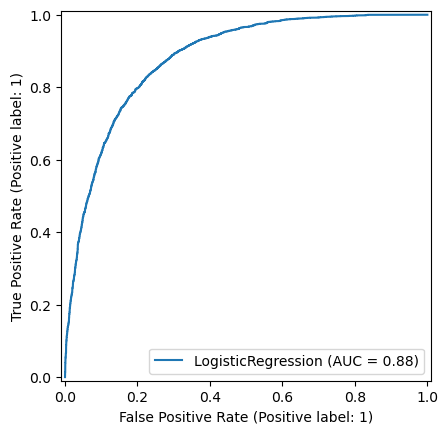

In [17]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(X=X_train, y=y_train, estimator=model)

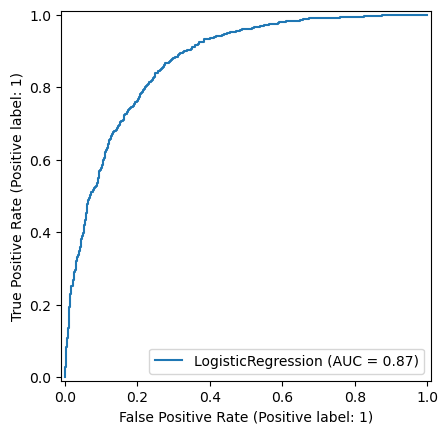

In [18]:
RocCurveDisplay.from_estimator(X=X_test, y=y_test, estimator=model)